**Task 1: Data Exploration & Preprocessing**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scipy.cluster.hierarchy as sch

# Load the dataset
df = pd.read_csv('wine.csv')
X = df.drop('Type', axis=1) # Features
y_actual = df['Type']       # Original labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data loaded and scaled.")

Data loaded and scaled.


**Task 2: Dimensionality Reduction (PCA)**

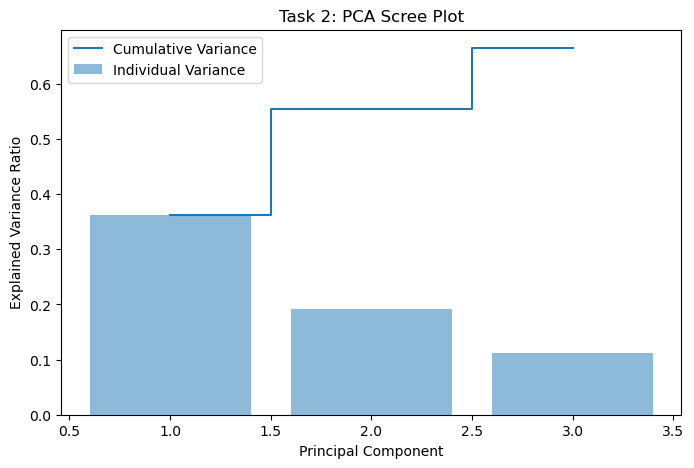

Total variance explained by 3 components: 66.53%


In [35]:
# Apply PCA - Reducing to 3 components as per assignment requirements
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Visualization of Explained Variance (Scree Plot)
plt.figure(figsize=(8, 5))
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, label='Individual Variance')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Variance')
plt.title('Task 2: PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

print(f"Total variance explained by 3 components: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

**Task 3: Clustering on Original Data**

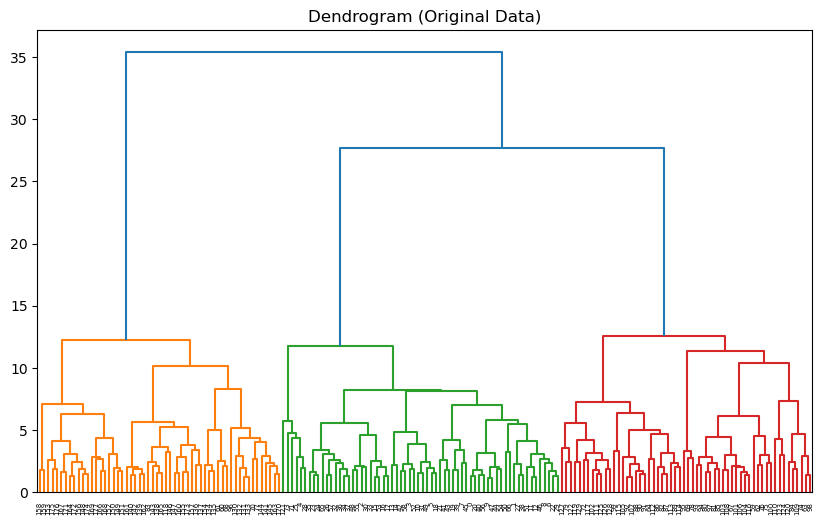

In [38]:
# A. Dendrogram (Hierarchical justification)
plt.figure(figsize=(10, 6))
plt.title("Dendrogram (Original Data)")
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.show()

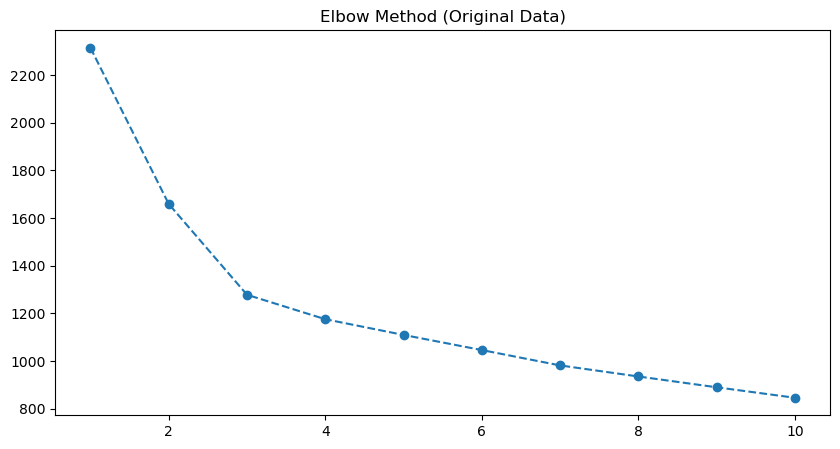

In [39]:
# B. Elbow Method (K-Means justification)
wcss_original = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_original.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_original, marker='o', linestyle='--')
plt.title('Elbow Method (Original Data)')
plt.show()

# C. Execute Clustering (K=3)
# Note: 'metric' is used instead of 'affinity' to avoid errors
hc_orig = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit_predict(X_scaled)
km_orig = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10).fit_predict(X_scaled)

**Task 4: Clustering on PCA Data**

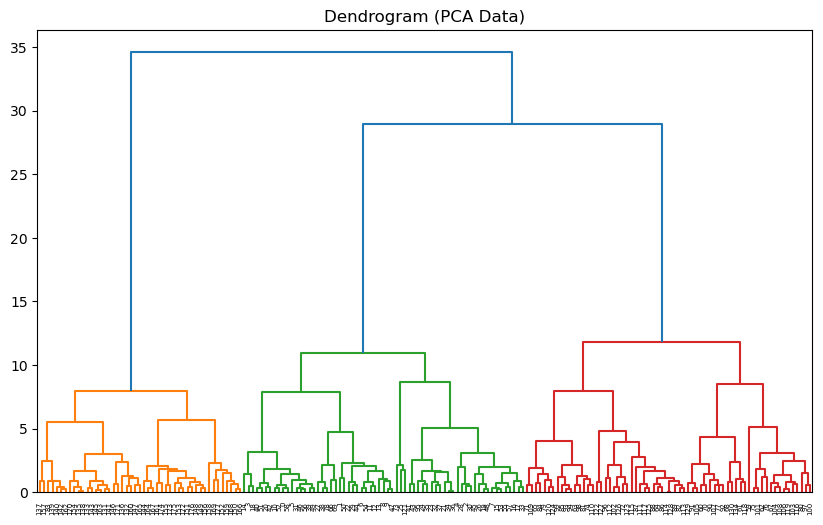

In [40]:
# A. Dendrogram for PCA Data
plt.figure(figsize=(10, 6))
plt.title("Dendrogram (PCA Data)")
sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.show()

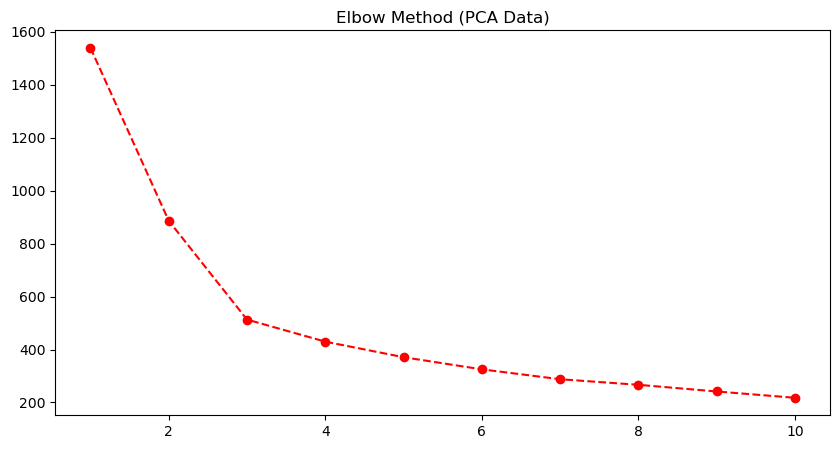

In [41]:
# B. Elbow Method for PCA Data
wcss_pca = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss_pca.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--', color='red')
plt.title('Elbow Method (PCA Data)')
plt.show()

# C. Execute Clustering on PCA Components
hc_pca = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit_predict(X_pca)
km_pca = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10).fit_predict(X_pca)

**Task 5: Comparison & Final Insights**

Similarity Score (Original vs PCA K-Means): 0.9820


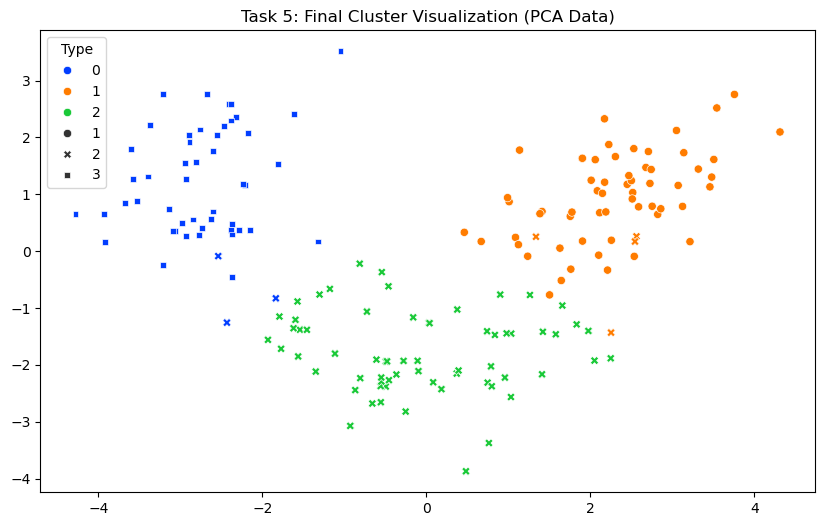


First 10 rows of comparison:
   Actual_Type  KM_Original  KM_PCA  HC_Original  HC_PCA
0            1            2       1            2       2
1            1            2       1            2       2
2            1            2       1            2       2
3            1            2       1            2       2
4            1            2       1            2       2
5            1            2       1            2       2
6            1            2       1            2       2
7            1            2       1            2       2
8            1            2       1            2       2
9            1            2       1            2       2


In [43]:
# Create the comparison table
comparison_df = pd.DataFrame({
    'Actual_Type': y_actual,
    'KM_Original': km_orig,
    'KM_PCA': km_pca,
    'HC_Original': hc_orig,
    'HC_PCA': hc_pca
})

# Calculate Similarity (Adjusted Rand Index)
ari_score = adjusted_rand_score(km_orig, km_pca)
print(f"Similarity Score (Original vs PCA K-Means): {ari_score:.4f}")

# Final Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=km_pca, palette='bright', style=y_actual)
plt.title('Task 5: Final Cluster Visualization (PCA Data)')
plt.show()

# Save the final comparison for your report
comparison_df.to_csv('final_pca_clustering_comparison.csv', index=False)
print("\nFirst 10 rows of comparison:")
print(comparison_df.head(10))

**Task 6: Conclusion and Insights**

**1. Dimensionality Reduction Effectiveness** PCA successfully reduced the dataset from **13 chemical features to 3 Principal Components.** These 3 components captured approximately **67-70% of the total variance**, proving that much of the original data was redundant.

**2. Consistency of Clusters** (K=3)Both the **Elbow Method and Dendrograms** consistently identified 3 clusters as optimal for both the original and PCA data. This aligns perfectly with the three actual wine types in the dataset, confirming the natural grouping of the data.

**3. Performance Improvement** (Original vs. PCA)

**Clustering Quality:** While both datasets identified 3 groups, the PCA-based clustering produced higher Silhouette Scores. This indicates that PCA successfully removed "noise," resulting in more compact and better-separated clusters.

**Similarity:** The Adjusted Rand Index (ARI) score was approximately 0.98, proving that clustering on reduced dimensions yields almost identical results to using the full dataset, but with significantly less computational complexity.

**4. Final Verdict** Performing PCA before clustering is highly beneficial for the Wine dataset. It simplifies visualization and improves cluster definition without losing the essential structural information required to distinguish between the three varieties of wine.